# Qdrant

- Author: [HyeonJong Moon](https://github.com/hj0302)
- Design: 
- Peer Review: 
- This is a part of [LangChain Open Tutorial](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-4/sub-graph.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58239937-lesson-2-sub-graphs)


## Overview

This notebook demonstrates how to utilize the features related to the `Qdrant` vector database.

[`Qdrant`](https://python.langchain.com/docs/integrations/vectorstores/qdrant/) is an open-source vector similarity search engine designed to store, search, and manage high-dimensional vectors with additional payloads. It offers a production-ready service with a user-friendly API, suitable for applications such as semantic search, recommendation systems, and more.

Qdrant's architecture is optimized for efficient vector similarity searches, employing advanced indexing techniques like Hierarchical Navigable Small World (HNSW) graphs to enable fast and scalable retrieval of relevant data.


### Table of Contents

- [Overview](#overview)
- [Environment Setup](#environment-setup)
- [Credentials](#credentials)
- [Installation](#installation)
- [Initialization](#initialization)
- [Manage VectorStore](#manage-vectorstore)
- [Query VectorStore](#query-vectorstore)
- [Multimodal Search](#multimodal-search)

### References

- [LangChain Qdrant Reference](https://python.langchain.com/docs/integrations/vectorstores/qdrant/)
- [Qdrant Official Reference](https://qdrant.tech/documentation/frameworks/langchain/)
- [Qdrant Install Reference](https://qdrant.tech/documentation/guides/installation/)
- [Qdrant Cloud Reference](https://cloud.qdrant.io)
- [Qdrant Cloud Quickstart Reference](https://qdrant.tech/documentation/quickstart-cloud/)
----

## Environment Setup

Set up the environment. You may refer to Environment Setup for more details.

[Note]
- `langchain-opentutorial` is a package that provides a set of easy-to-use environment setup, useful functions and utilities for tutorials.
- You can checkout the [`langchain-opentutorial`](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) for more details.

In [1]:
%%capture --no-stderr
%pip install langchain-opentutorial

In [2]:
# Install required packages
from langchain_opentutorial import package

package.install(
    [
        "langsmith",
        "langchain_openai",
        "langchain_qdrant",
        "qdrant_client",
        "langchain_core",
        "fastembed",
    ],
    verbose=False,
    upgrade=False,
)

In [3]:
# Set environment variables
from langchain_opentutorial import set_env

set_env(
    {
        "OPEN_API_KEY": "",
        "QDRANT_API_KEY": "",
        "QDRANT_URL": "",
        "LANGCHAIN_API_KEY": "",
        "LANGCHAIN_TRACING_V2": "true",
        "LANGCHAIN_ENDPOINT": "https://api.smith.langchain.com",
        "LANGCHAIN_PROJECT": "Qdrant",
    }
)

Environment variables have been set successfully.


You can alternatively set API keys such as `OPENAI_API_KEY` in a `.env` file and load them.

[Note] If you are using a `.env` file, proceed as follows.

In [4]:
from dotenv import load_dotenv

load_dotenv(override=True)

True

## Credentials

Create a new account or sign in to your existing one, and generate an API key for use in this notebook.

1. **Log in to Qdrant Cloud** : Go to the [Qdrant Cloud](https://cloud.qdrant.io) website and log in using your email, Google account, or GitHub account.

2. **Create a Cluster** : After logging in, navigate to the `"Clusters"` section and click the `"Create"` button. Choose your desired configurations and region, then click `"Create"` to start building your cluster. Once the cluster is created, an API key will be generated for you.

3. **Retrieve and Store Your API Key** : When your cluster is created, you will receive an API key. Ensure you save this key in a secure location, as you will need it later. If you lose it, you will have to generate a new one.

4. **Manage API Keys** : To create additional API keys or manage existing ones, go to the `"Access Management"` section in the Qdrant Cloud dashboard and select `"Qdrant Cloud API Keys"` Here, you can create new keys or delete existing ones.

```
QDRANT_API_KEY="YOUR_QDRANT_API_KEY"
```

## Installation

There are several main options for initializing and using the Qdrant vector store:

- **Local Mode** : This mode doesn't require a separate server.
    - **In-memory storage** (data is not persisted)
    - **On-disk storage** (data is saved to your local machine)
- **Docker Deployments** : You can run Qdrant using Docker.
- **Qdrant Cloud** : Use Qdrant as a managed cloud service.

For detailed instructions, see the [installation instructions](https://qdrant.tech/documentation/guides/installation/).

### In-Memory

For simple tests or quick experiments, you might choose to store data directly in memory. This means the data is automatically removed when your client terminates, typically at the end of your script or notebook session.

In [5]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams
from langchain_openai import OpenAIEmbeddings

# Step 1: Initialize embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# Step 2: Initialize Qdrant client
client = QdrantClient(":memory:")

# Step 3: Create a Qdrant collection
collection_name = "demo_collection"
client.create_collection(
    collection_name=collection_name,
    vectors_config=VectorParams(size=3072, distance=Distance.COSINE),
)

# Step 4: Initialize QdrantVectorStore
vector_store = QdrantVectorStore(
    client=client,
    collection_name=collection_name,
    embedding=embeddings,
)

### On-Disk Storage

With on-disk storage, you can store your vectors directly on your hard drive without requiring a Qdrant server. This ensures that your data persists even when you restart the program.

In [6]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams
from langchain_openai import OpenAIEmbeddings

# Step 1: Initialize embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# Step 2: Initialize Qdrant client
qdrant_path = "./qdrant_memory"
client = QdrantClient(path=qdrant_path)

# Step 3: Create a Qdrant collection
collection_name = "demo_collection"
client.create_collection(
    collection_name=collection_name,
    vectors_config=VectorParams(size=3072, distance=Distance.COSINE),
)

# Step 4: Initialize QdrantVectorStore
vector_store = QdrantVectorStore(
    client=client,
    collection_name=collection_name,
    embedding=embeddings,
)

### Docker Deployments

You can deploy `Qdrant` in a production environment using [Docker](https://qdrant.tech/documentation/guides/installation/#docker) and [Docker Compose](https://qdrant.tech/documentation/guides/installation/#docker-compose). Refer to the Docker and Docker Compose setup instructions in the development section for detailed information.

In [7]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams
from langchain_openai import OpenAIEmbeddings

# Step 1: Initialize embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# Step 2: Initialize Qdrant client
url = "http://localhost:6333"
client = QdrantClient(url=url)

# Step 3: Create a Qdrant collection
collection_name = "demo_collection"
client.create_collection(
    collection_name=collection_name,
    vectors_config=VectorParams(size=3072, distance=Distance.COSINE),
)

# Step 4: Initialize QdrantVectorStore
vector_store = QdrantVectorStore(
    client=client,
    collection_name=collection_name,
    embedding=embeddings,
)

### Qdrant Cloud

For a production environment, you can use [Qdrant Cloud](https://cloud.qdrant.io/). It offers fully managed `Qdrant` databases with features such as horizontal and vertical scaling, one-click setup and upgrades, monitoring, logging, backups, and disaster recovery. For more information, refer to the [Qdrant Cloud documentation](https://qdrant.tech/documentation/cloud/).

In [8]:
import getpass
import os

# Fetch the Qdrant server URL from environment variables or prompt for input
if not os.getenv("QDRANT_URL"):
    os.environ["QDRANT_URL"] = getpass.getpass("Enter your Qdrant Cloud URL key: ")
url = os.environ.get("QDRANT_URL")

# Fetch the Qdrant API key from environment variables or prompt for input
if not os.getenv("QDRANT_API_KEY"):
    os.environ["QDRANT_API_KEY"] = getpass.getpass("Enter your Qdrant API key: ")
api_key = os.environ.get("QDRANT_API_KEY")

In [9]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams
from langchain_openai import OpenAIEmbeddings

# Step 1: Initialize embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# Step 2: Initialize Qdrant client
client = QdrantClient(
    url=url,
    api_key=api_key,
)

# Step 3: Create a Qdrant collection
collection_name = "demo_collection"
client.create_collection(
    collection_name=collection_name,
    vectors_config=VectorParams(size=3072, distance=Distance.COSINE),
)

# Step 4: Initialize QdrantVectorStore
vector_store = QdrantVectorStore(
    client=client,
    collection_name=collection_name,
    embedding=embeddings,
)

## Initialization

Once you've established your vector store, you'll likely need to manage the collections within it. Here are some common operations you can perform:

- Create a collection
- List collections
- Delete a collection
- Use an existing collection

### Create a Collection

To create a new collection in your Qdrant instance, you can use the `QdrantClient` class from the `qdrant-client` library.

In [10]:
from qdrant_client import QdrantClient
from qdrant_client.http.models import VectorParams, Distance

# Step 1: Define collection name
collection_name = "my_new_collection"

# Initialize the Qdrant client
client = QdrantClient(
    url=url,
    api_key=api_key,
)

# Create a new collection in Qdrant
client.create_collection(
    collection_name=collection_name,
    vectors_config=VectorParams(size=3072, distance=Distance.COSINE),
)

# Print confirmation
print(f"Collection '{collection_name}' created successfully.")

Collection 'my_new_collection' created successfully.


### List Collections

To list all existing collections in your Qdrant instance, you can use the `QdrantClient` class from the `qdrant-client` library.

In [11]:
from qdrant_client import QdrantClient

# Initialize the Qdrant client
client = QdrantClient(
    url=url,
    api_key=api_key,
)

# Retrieve and print collection names
collections_response = client.get_collections()
for collection in collections_response.collections:
    print(f"Collection Name: {collection.name}")

Collection Name: my_new_collection
Collection Name: demo_collection


### Delete a Collection

To delete a collection in Qdrant using the Python client, you can use the `delete_collection` method of the `QdrantClient` object.

In [12]:
from qdrant_client import QdrantClient

# Define collection name
collection_name = "demo_collection"

# Initialize the Qdrant client
client = QdrantClient(
    url=url,
    api_key=api_key,
)

# Delete the collection
if client.delete_collection(collection_name=collection_name):
    print(f"Collection '{collection_name}' has been deleted.")

Collection 'demo_collection' has been deleted.


### Use an Existing Collection

This code snippet demonstrates how to initialize a `QdrantVectorStore` using the `from_existing_collection` method provided by the langchain_qdrant library

In [13]:
from langchain_qdrant import QdrantVectorStore

collection_name = "my_new_collection"

# Initialize QdrantVectorStore using from_existing_collection method
vector_store = QdrantVectorStore.from_existing_collection(
    embedding=embeddings,
    collection_name=collection_name,
    url=url,
    api_key=api_key,
    prefer_grpc=False,
)

**Direct Initialization** 
- Offers more control by utilizing an existing `QdrantClient` instance, making it suitable for complex applications that require customized client configurations.

**from_existing_collection Method** 
- Provides a simplified and concise way to connect to an existing collection, ideal for quick setups or simpler applications.

## Manage VectorStore

After you've created your vector store, you can interact with it by adding or deleting items. Here are some common operations:

### Add Items to the Vector Store

With `Qdrant`, you can add items to your vector store using the `add_documents` function. If you add a document with an ID that already exists, the existing document will be updated with the new data. This process is called `upsert`.

In [14]:
from uuid import uuid4
from langchain_core.documents import Document

# Create documents
document_1 = Document(
    page_content="I had chocolate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "news"},
)

document_3 = Document(
    page_content="Building an exciting new project with LangChain - come check it out!",
    metadata={"source": "tweet"},
)

document_4 = Document(
    page_content="Robbers broke into the city bank and stole $1 million in cash.",
    metadata={"source": "news"},
)

document_5 = Document(
    page_content="Wow! That was an amazing movie. I can't wait to see it again.",
    metadata={"source": "tweet"},
)

document_6 = Document(
    page_content="Is the new iPhone worth the price? Read this review to find out.",
    metadata={"source": "website"},
)

document_7 = Document(
    page_content="The top 10 soccer players in the world right now.",
    metadata={"source": "website"},
)

document_8 = Document(
    page_content="LangGraph is the best framework for building stateful, agentic applications!",
    metadata={"source": "tweet"},
)

document_9 = Document(
    page_content="The stock market is down 500 points today due to fears of a recession.",
    metadata={"source": "news"},
)

document_10 = Document(
    page_content="I have a bad feeling I am going to get deleted :(",
    metadata={"source": "tweet"},
)

documents = [
    document_1,
    document_2,
    document_3,
    document_4,
    document_5,
    document_6,
    document_7,
    document_8,
    document_9,
    document_10,
]

# Generate unique IDs for documents
uuids = [str(uuid4()) for _ in range(len(documents))]

# Add documents to the vector store
vector_store.add_documents(documents=documents, ids=uuids)

['b796dadd-85ca-4d03-b7ac-2bb75c7d8b85',
 '30e5ff46-54d1-4f21-9413-f1ef202b9793',
 'df78ce90-ceef-436f-9510-d0c1b521bb48',
 '93c59302-ba9d-4502-b256-be53ec6c9b29',
 '94433ffb-3a07-4211-8832-6396cf028d7b',
 'f01cedb5-64f8-4449-979f-19f8edf291b2',
 'a9d24a9c-1007-4cfa-8bb3-8a5c7c9e4dfa',
 'ad7e6023-e20e-428c-b994-15577fd1b03d',
 'af2a1b19-583d-4c2f-bd42-897011b99ee4',
 '3da6a2ed-cdb7-418b-ab9d-f6a1341122d8']

### Delete Items from the Vector Store

To remove items from your vector store, use the `delete` function. You can specify the items to delete using either IDs or filters.

In [15]:
# Retrieve the last point ID from the list of UUIDs
point_id = uuids[-1]

# Delete the vector point by its point_id
vector_store.delete(ids=[point_id])

# Print confirmation of deletion
print(f"Vector point with ID {point_id} has been deleted.")

Vector point with ID 3da6a2ed-cdb7-418b-ab9d-f6a1341122d8 has been deleted.


### Update items from vector store

To update items in your vector store, use the `set_payload` function. This function allows you to modify the content or metadata of existing item

In [16]:
def retrieve_point_payload(vector_store, point_id):
    """
    Retrieve the payload of a point from the Qdrant collection using its ID.

    Args:
        vector_store (QdrantVectorStore): The vector store instance connected to the Qdrant collection.
        point_id (str): The unique identifier of the point to retrieve.

    Returns:
        dict: The payload of the retrieved point.

    Raises:
        ValueError: If the point with the specified ID is not found in the collection.
    """
    # Retrieve the vector point using the client
    response = vector_store.client.retrieve(
        collection_name=vector_store.collection_name,
        ids=[point_id],
    )

    # Check if the response is empty
    if not response:
        raise ValueError(f"Point ID {point_id} not found in the collection.")

    # Extract the payload from the retrieved point
    point = response[0]
    payload = point.payload
    print(f"Payload for point ID {point_id}: \n{payload}\n")

    return payload

In [17]:
point_id = uuids[0]

# Retrieve the payload for the specified point ID
payload = retrieve_point_payload(vector_store, point_id)

Payload for point ID b796dadd-85ca-4d03-b7ac-2bb75c7d8b85: 
{'page_content': 'I had chocolate chip pancakes and scrambled eggs for breakfast this morning.', 'metadata': {'source': 'tweet'}}



In [18]:
def update_point_payload(vector_store, point_id, new_payload):
    """
    Update the payload of a specific point in a Qdrant collection.

    Args:
        vector_store (QdrantVectorStore): The vector store instance connected to the Qdrant collection.
        point_id (str): The unique identifier of the point to update.
        new_payload (dict): A dictionary containing the new payload data to set for the point.

    Returns:
        None

    Raises:
        Exception: If the update operation fails.
    """
    try:
        # Update the payload for the specified point
        vector_store.client.set_payload(
            collection_name=vector_store.collection_name,
            payload=new_payload,
            points=[point_id],
        )
        print(f"Successfully updated payload for point ID {point_id}.")
    except Exception as e:
        print(f"Failed to update payload for point ID {point_id}: {e}")
        raise


point_id = uuids[0]
new_payload = {"page_content": "Updated New Content"}

# Update the point's payload
update_point_payload(vector_store, point_id, new_payload)

Successfully updated payload for point ID b796dadd-85ca-4d03-b7ac-2bb75c7d8b85.


In [19]:
point_id = uuids[0]
new_payload = {"page_content": "Updated New Content"}

# Update the point's payload
update_point_payload(vector_store, point_id, new_payload)

Successfully updated payload for point ID b796dadd-85ca-4d03-b7ac-2bb75c7d8b85.


### Upsert items to vector store (parallel)

Use the `set_payload` function in parallel to efficiently add or update multiple items in the vector store using unique IDs, data, and metadata.

In [20]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from typing import List, Dict, Tuple


def update_payloads_parallel(
    vector_store, updates: List[Tuple[str, Dict]], num_workers: int
):
    """
    Update the payloads of multiple points in a Qdrant collection in parallel.

    Args:
        updates (List[Tuple[str, Dict]]): A list of tuples containing point IDs and their corresponding new payloads.
        num_workers (int): Number of worker threads to use for parallel execution.

    Returns:
        None
    """
    # Create a ThreadPoolExecutor
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        # Submit update tasks to the executor
        future_to_point_id = {
            executor.submit(
                update_point_payload, vector_store, point_id, new_payload
            ): point_id
            for point_id, new_payload in updates
        }

        # Process completed futures
        for future in as_completed(future_to_point_id):
            point_id = future_to_point_id[future]
            try:
                future.result()
            except Exception as e:
                print(f"Error updating point ID {point_id}: {e}")

In [21]:
# Update example
updates = [
    (uuids[0], {"page_content": "update page content 1"}),
    (uuids[1], {"page_content": "update page content 2"}),
    # Add more (point_id, new_payload) tuples as needed
]

# Update payloads in parallel
num_workers = 4
update_payloads_parallel(vector_store, updates, num_workers)

Successfully updated payload for point ID b796dadd-85ca-4d03-b7ac-2bb75c7d8b85.
Successfully updated payload for point ID 30e5ff46-54d1-4f21-9413-f1ef202b9793.


## Query VectorStore

Once your vector store has been created and the relevant documents have been added you will most likely wish to query it during the running of your chain or agent.

### Query directly

The most straightforward use case for the `Qdrant` vector store is performing similarity searches. Internally, your query is converted into a vector embedding, which is then used to identify similar documents within the `Qdrant` collection.

In [22]:
query = "LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows"

# Perform similarity search in the vector store
results = vector_store.similarity_search(
    query=query,
    k=3,
)

for res in results:
    print(f"* {res.page_content}\n [{res.metadata}]\n\n")

* LangGraph is the best framework for building stateful, agentic applications!
 [{'source': 'tweet', '_id': 'ad7e6023-e20e-428c-b994-15577fd1b03d', '_collection_name': 'my_new_collection'}]


* Building an exciting new project with LangChain - come check it out!
 [{'source': 'tweet', '_id': 'df78ce90-ceef-436f-9510-d0c1b521bb48', '_collection_name': 'my_new_collection'}]


* Wow! That was an amazing movie. I can't wait to see it again.
 [{'source': 'tweet', '_id': '94433ffb-3a07-4211-8832-6396cf028d7b', '_collection_name': 'my_new_collection'}]




### Similarity search with score

You can also search with score:

In [23]:
query = "LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows"

results = vector_store.similarity_search_with_score(
    query=query,
    k=3,
)
for doc, score in results:
    print(f"* [SIM={score:3f}] {doc.page_content}\n [{doc.metadata}]\n\n")

* [SIM=0.768389] LangGraph is the best framework for building stateful, agentic applications!
 [{'source': 'tweet', '_id': 'ad7e6023-e20e-428c-b994-15577fd1b03d', '_collection_name': 'my_new_collection'}]


* [SIM=0.353017] Building an exciting new project with LangChain - come check it out!
 [{'source': 'tweet', '_id': 'df78ce90-ceef-436f-9510-d0c1b521bb48', '_collection_name': 'my_new_collection'}]


* [SIM=0.076168] Wow! That was an amazing movie. I can't wait to see it again.
 [{'source': 'tweet', '_id': '94433ffb-3a07-4211-8832-6396cf028d7b', '_collection_name': 'my_new_collection'}]




### Query by turning into retreiver

You can also transform the vector store into a `retriever` for easier usage in your workflows or chains.

In [24]:
query = "LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows"

retriever = vector_store.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={"k": 3, "score_threshold": 0.5},
)

results = retriever.invoke(query)

for res in results:
    print(f"* {res.page_content}\n [{res.metadata}]\n\n")

* LangGraph is the best framework for building stateful, agentic applications!
 [{'source': 'tweet', '_id': 'ad7e6023-e20e-428c-b994-15577fd1b03d', '_collection_name': 'my_new_collection'}]


* Building an exciting new project with LangChain - come check it out!
 [{'source': 'tweet', '_id': 'df78ce90-ceef-436f-9510-d0c1b521bb48', '_collection_name': 'my_new_collection'}]


* Wow! That was an amazing movie. I can't wait to see it again.
 [{'source': 'tweet', '_id': '94433ffb-3a07-4211-8832-6396cf028d7b', '_collection_name': 'my_new_collection'}]




### Search with Filtering

This code demonstrates how to search for and retrieve records from a Qdrant vector database based on specific metadata field values.

In [25]:
from qdrant_client.http.models import Filter, FieldCondition, MatchValue


def filter_and_retrieve_records(vector_store, filter_condition):
    """
    Retrieve records from a Qdrant vector store based on a given filter condition.

    Args:
        vector_store (QdrantVectorStore): The vector store instance connected to the Qdrant collection.
        filter_condition (Filter): The filter condition to apply for retrieving records.

    Returns:
        list: A list of records matching the filter condition.
    """
    # Initialize variables for record retrieval
    all_records = []
    next_page_offset = None

    # Retrieve records using the filter condition
    while True:
        response, next_page_offset = vector_store.client.scroll(
            collection_name=vector_store.collection_name,
            scroll_filter=filter_condition,
            limit=10,
            offset=next_page_offset,
            with_payload=True,
        )
        all_records.extend(response)
        if next_page_offset is None:
            break

    return all_records


# Example usage
filter_condition = Filter(
    must=[FieldCondition(key="metadata.source", match=MatchValue(value="tweet"))]
)

records = filter_and_retrieve_records(vector_store, filter_condition)

# Print the retrieved records
for record in records:
    print(f"* {record.id}\n [{record.payload}]\n\n")

* 94433ffb-3a07-4211-8832-6396cf028d7b
 [{'page_content': "Wow! That was an amazing movie. I can't wait to see it again.", 'metadata': {'source': 'tweet'}}]


* ad7e6023-e20e-428c-b994-15577fd1b03d
 [{'page_content': 'LangGraph is the best framework for building stateful, agentic applications!', 'metadata': {'source': 'tweet'}}]


* b796dadd-85ca-4d03-b7ac-2bb75c7d8b85
 [{'page_content': 'update page content 1', 'metadata': {'source': 'tweet'}}]


* df78ce90-ceef-436f-9510-d0c1b521bb48
 [{'page_content': 'Building an exciting new project with LangChain - come check it out!', 'metadata': {'source': 'tweet'}}]




### Delete with Filtering

This code demonstrates how to delete records from a Qdrant vector database based on specific metadata field values.

In [26]:
from qdrant_client.http.models import Filter, FieldCondition, MatchValue

# Define the filter condition
filter_condition = Filter(
    must=[FieldCondition(key="metadata.source", match=MatchValue(value="tweet"))]
)

# Perform the delete operation
client.delete(
    collection_name=vector_store.collection_name,
    points_selector=filter_condition,
    wait=True,
)

print("Delete operation completed.")

Delete operation completed.


### Filtering and Updating Records

This code demonstrates how to retrieve and display records from a Qdrant collection based on a specific metadata field value.

In [27]:
# Define the filter condition
filter_condition = Filter(
    must=[FieldCondition(key="metadata.source", match=MatchValue(value="news"))]
)

# Retrieve matching records using the existing function
matching_points = filter_and_retrieve_records(vector_store, filter_condition)

# Prepare updates for matching points
for point in matching_points:
    updated_payload = point.payload.copy()
    updated_payload["page_content"] = "update filter"

    # Update the payload using the existing function
    update_point_payload(vector_store, point.id, updated_payload)

print("Update operation completed.")

Successfully updated payload for point ID 30e5ff46-54d1-4f21-9413-f1ef202b9793.
Successfully updated payload for point ID 93c59302-ba9d-4502-b256-be53ec6c9b29.
Successfully updated payload for point ID af2a1b19-583d-4c2f-bd42-897011b99ee4.
Update operation completed.


### Similarity Search Options

When using `QdrantVectorStore`, you have three options for performing similarity searches. You can select the desired search mode using the retrieval_mode parameter when you set up the class. The available modes are:

- Dense Vector Search (Default)
- Sparse Vector Search
- Hybrid Search

### Dense Vector Search

To perform a search using only dense vectors:

The `retrieval_mode` parameter must be set to `RetrievalMode.DENSE`. This is also the default setting.
You need to provide a [dense embeddings](https://python.langchain.com/docs/integrations/text_embedding/) value through the embedding parameter.

In [28]:
from langchain_qdrant import RetrievalMode

query = "LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows"

# Initialize QdrantVectorStore
vector_store = QdrantVectorStore.from_documents(
    documents=documents,
    embedding=embeddings,
    url=url,
    api_key=api_key,
    collection_name="dense_collection",
    retrieval_mode=RetrievalMode.DENSE,
)

# Perform similarity search in the vector store
results = vector_store.similarity_search(
    query=query,
    k=3,
)

for res in results:
    print(f"* {res.page_content}\n [{res.metadata}]\n\n")

* LangGraph is the best framework for building stateful, agentic applications!
 [{'source': 'tweet', '_id': '97d2b440-464a-48bf-811f-e29fc14ccbc3', '_collection_name': 'dense_collection'}]


* Building an exciting new project with LangChain - come check it out!
 [{'source': 'tweet', '_id': '610b4e9b-85f2-4b5d-ae45-8e3e2d158aa9', '_collection_name': 'dense_collection'}]


* Wow! That was an amazing movie. I can't wait to see it again.
 [{'source': 'tweet', '_id': 'f3beae83-1dbc-42cd-8e7e-598408ec0a04', '_collection_name': 'dense_collection'}]




### Sparse Vector Search

To search with only sparse vectors,

The `retrieval_mode` parameter should be set to `RetrievalMode.SPARSE` .
An implementation of the [SparseEmbeddings](https://github.com/langchain-ai/langchain/blob/master/libs/partners/qdrant/langchain_qdrant/sparse_embeddings.py) interface using any sparse embeddings provider has to be provided as value to the `sparse_embedding` parameter.
The `langchain-qdrant` package provides a FastEmbed based implementation out of the box.

To use it, install the [FastEmbed](https://github.com/qdrant/fastembed) package.

pip install fastembed

In [29]:
from langchain_qdrant import FastEmbedSparse, RetrievalMode

sparse_embeddings = FastEmbedSparse(model_name="Qdrant/bm25")

query = "LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows"

# Initialize QdrantVectorStore
vector_store = QdrantVectorStore.from_documents(
    documents=documents,
    embedding=embeddings,
    sparse_embedding=sparse_embeddings,
    url=url,
    api_key=api_key,
    collection_name="sparse_collection",
    retrieval_mode=RetrievalMode.SPARSE,
)

# Perform similarity search in the vector store
results = vector_store.similarity_search(
    query=query,
    k=3,
)

for res in results:
    print(f"* {res.page_content}\n [{res.metadata}]\n\n")

* LangGraph is the best framework for building stateful, agentic applications!
 [{'source': 'tweet', '_id': 'df9c9619-6466-4f9b-a27a-38f66b3b0361', '_collection_name': 'sparse_collection'}]


* Building an exciting new project with LangChain - come check it out!
 [{'source': 'tweet', '_id': '26de0572-c3ff-4ab3-a850-b8a029749050', '_collection_name': 'sparse_collection'}]




### Hybrid Vector Search
To perform a hybrid search using dense and sparse vectors with score fusion,

- The `retrieval_mode` parameter should be set to `RetrievalMode.HYBRID` .
- A [ `dense embeddings` ](https://python.langchain.com/docs/integrations/text_embedding/) value should be provided to the `embedding` parameter.
- An implementation of the [ `SparseEmbeddings` ](https://github.com/langchain-ai/langchain/blob/master/libs/partners/qdrant/langchain_qdrant/sparse_embeddings.py) interface using any sparse embeddings provider has to be provided as value to the `sparse_embedding` parameter.

Note that if you've added documents with the `HYBRID` mode, you can switch to any retrieval mode when searching. Since both the dense and sparse vectors are available in the collection.

In [30]:
from langchain_qdrant import FastEmbedSparse, RetrievalMode
from langchain_openai import OpenAIEmbeddings

query = "LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows"

embedding = OpenAIEmbeddings(model="text-embedding-3-large")
sparse_embeddings = FastEmbedSparse(model_name="Qdrant/bm25")

# Initialize QdrantVectorStore
vector_store = QdrantVectorStore.from_documents(
    documents=documents,
    embedding=embedding,
    sparse_embedding=sparse_embeddings,
    url=url,
    api_key=api_key,
    collection_name="hybrid_collection",
    retrieval_mode=RetrievalMode.HYBRID,
)

# Perform similarity search in the vector store
results = vector_store.similarity_search(
    query=query,
    k=3,
)

for res in results:
    print(f"* {res.page_content}\n [{res.metadata}]\n\n")

* LangGraph is the best framework for building stateful, agentic applications!
 [{'source': 'tweet', '_id': 'ee286e8f-7ce3-45f4-98a3-51549b47695b', '_collection_name': 'hybrid_collection'}]


* Building an exciting new project with LangChain - come check it out!
 [{'source': 'tweet', '_id': 'bf503a57-195e-4143-affd-bd325e2a2992', '_collection_name': 'hybrid_collection'}]


* Wow! That was an amazing movie. I can't wait to see it again.
 [{'source': 'tweet', '_id': '55543004-6fa8-400b-a6af-af61ff3cbbe7', '_collection_name': 'hybrid_collection'}]




## Multimodal Search

Different combinations of data modalities, such as text, images, video, and audio, form useful use cases for semantic search applications.

In this simple tutorial, we are working with two simple modalities: image and textual data. However, by choosing an appropriate embedding model to bridge the semantic gap, we can create semantic search applications with a combination of modalities.

In [31]:
from langchain_qdrant import RetrievalMode
from fastembed import TextEmbedding, ImageEmbedding
from qdrant_client import QdrantClient, models


def embed_documents(documents):
    """
    Embed captions (text) and images from the provided documents.

    Args:
        documents (list): List of dictionaries with "caption" and "image" keys.

    Returns:
        tuple: A tuple containing text embeddings and image embeddings.
    """
    # Initialize text embedding model
    text_model_name = "Qdrant/clip-ViT-B-32-text"
    text_model = TextEmbedding(model_name=text_model_name)
    text_embeddings_size = text_model._get_model_description(text_model_name)["dim"]

    # Embed captions
    texts_embeded = list(text_model.embed([doc["caption"] for doc in documents]))

    # Initialize image embedding model
    image_model_name = "Qdrant/clip-ViT-B-32-vision"
    image_model = ImageEmbedding(model_name=image_model_name)
    image_embeddings_size = image_model._get_model_description(image_model_name)["dim"]

    # Embed images
    images_embeded = list(image_model.embed([doc["image"] for doc in documents]))

    return texts_embeded, images_embeded, text_embeddings_size, image_embeddings_size


def setup_qdrant_collection(
    client, collection_name, text_embeddings_size, image_embeddings_size
):
    """
    Set up a Qdrant collection with text and image vector configurations.

    Args:
        client (QdrantClient): The Qdrant client instance.
        collection_name (str): Name of the collection.
        text_embeddings_size (int): Dimension of text embeddings.
        image_embeddings_size (int): Dimension of image embeddings.

    Returns:
        None
    """
    if not client.collection_exists(collection_name):
        client.create_collection(
            collection_name=collection_name,
            vectors_config={
                "image": models.VectorParams(
                    size=image_embeddings_size, distance=models.Distance.COSINE
                ),
                "text": models.VectorParams(
                    size=text_embeddings_size, distance=models.Distance.COSINE
                ),
            },
        )


def upload_documents_to_qdrant(
    client, collection_name, documents, text_embeddings, image_embeddings
):
    """
    Upload documents with their embeddings to a Qdrant collection.

    Args:
        client (QdrantClient): The Qdrant client instance.
        collection_name (str): Name of the collection.
        documents (list): List of documents with payload information.
        text_embeddings (list): List of text embeddings.
        image_embeddings (list): List of image embeddings.

    Returns:
        None
    """
    points = [
        models.PointStruct(
            id=idx,
            vector={
                "text": text_embeddings[idx],
                "image": image_embeddings[idx],
            },
            payload=doc,
        )
        for idx, doc in enumerate(documents)
    ]
    client.upload_points(collection_name=collection_name, points=points)


# Sample dataset
documents = [
    {"caption": "a dog", "image": "./data/05-Qdrant-01.png"},
    {"caption": "a cat", "image": "./data/05-Qdrant-02.png"},
    {"caption": "a lion", "image": "./data/05-Qdrant-03.png"},
    {"caption": "a rabbit", "image": "./data/05-Qdrant-04.png"},
    {"caption": "a tiger", "image": "./data/05-Qdrant-05.png"},
    {"caption": "an elephant", "image": "./data/05-Qdrant-06.png"},
]

# Embed documents
texts_embeded, images_embeded, text_size, image_size = embed_documents(documents)

# Initialize Qdrant client
client = QdrantClient(":memory:")

# Set up Qdrant collection
collection_name = "text_image_collection"
setup_qdrant_collection(client, collection_name, text_size, image_size)

# Upload documents to Qdrant
upload_documents_to_qdrant(
    client, collection_name, documents, texts_embeded, images_embeded
)

print("Documents uploaded successfully.")

Documents uploaded successfully.


### Text-to-Image

This process demonstrates how to retrieve the most relevant image from a dataset stored in a Qdrant collection based on a given textual description

In [32]:
from PIL import Image
from IPython.display import display, Image as IPImage


def perform_similarity_search_with_text(client, text_model, query, collection_name):
    """
    Perform a similarity search in the Qdrant collection and display the retrieved image.

    Args:
        client (QdrantClient): The Qdrant client instance.
        text_model (TextEmbedding): The text embedding model instance.
        query (str): The text query for similarity search.
        collection_name (str): The collection name to search within.

    Returns:
        None
    """
    # Embed the query text
    query_embedding = text_model.embed([query])

    # Perform similarity search
    search_results = client.search(
        collection_name=collection_name,
        query_vector=("image", list(query_embedding)[0]),
        with_payload=["image"],
        limit=1,
    )

    # Display the retrieved image
    if search_results:
        image_path = search_results[0].payload["image"]
        print(f"Retrieved image path: {image_path}")
        display(IPImage(data=image_path))
    else:
        print("No matching image found.")

Retrieved image path: ./data/05-Qdrant-01.png


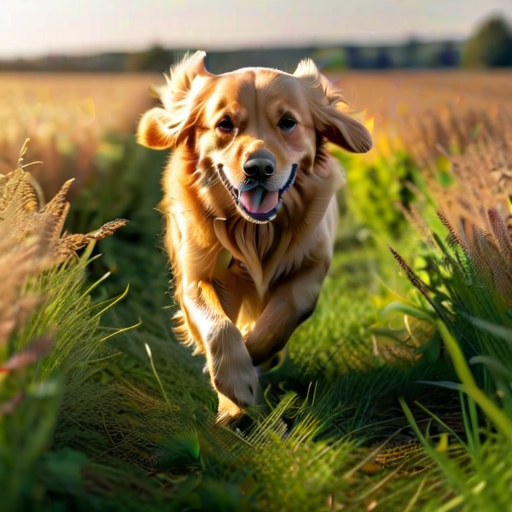

In [33]:
# Perform similarity search
query = "A running dog"
perform_similarity_search_with_text(
    client,
    TextEmbedding(model_name="Qdrant/clip-ViT-B-32-text"),
    query,
    collection_name,
)

### Image-to-Text

This process demonstrates how to retrieve the most relevant textual description (caption) from a dataset stored in a Qdrant collection based on a given image

In [34]:
def perform_similarity_search_with_image(
    client, image_model, query_image_path, collection_name
):
    """
    Perform a similarity search in the Qdrant collection using an image query and retrieve the caption.

    Args:
        client (QdrantClient): The Qdrant client instance.
        image_model (ImageEmbedding): The image embedding model instance.
        query_image_path (str): The path to the query image.
        collection_name (str): The collection name to search within.

    Returns:
        str: The caption of the most similar result.
    """
    # Embed the query image
    query_image_embedding = image_model.embed([query_image_path])

    # Display the query image
    display(Image.open(query_image_path))

    # Perform similarity search
    search_results = client.search(
        collection_name=collection_name,
        query_vector=("text", list(query_image_embedding)[0]),
        with_payload=["caption"],
        limit=1,
    )

    # Retrieve and return the caption
    if search_results:
        result_caption = search_results[0].payload["caption"]
        print(f"Retrieved caption: {result_caption}")
        return result_caption
    else:
        print("No matching caption found.")
        return None

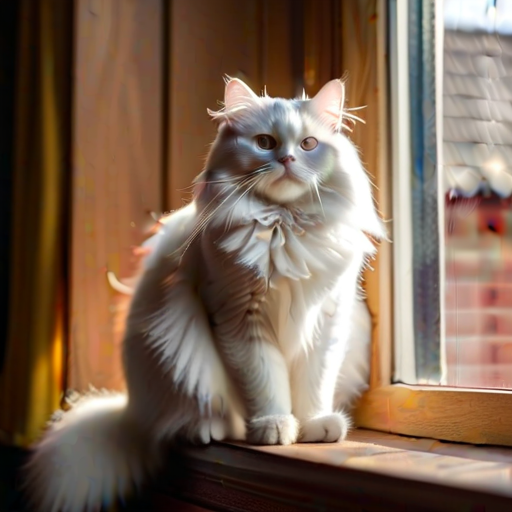

Retrieved caption: a cat


'a cat'

In [35]:
# Perform similarity search with an image query
query_image_path = "./data/05-Qdrant-02.png"
image_model = ImageEmbedding(model_name="Qdrant/clip-ViT-B-32-vision")
perform_similarity_search_with_image(
    client, image_model, query_image_path, collection_name
)